# **AlloCiné Analysis**

We had web scraped (see [the script here](https://github.com/Bastien-LDC/Allocine-project/blob/master/Webscraping_From_AlloCine.ipynb)) the data from the AlloCiné website. AlloCiné is a company which provides information on French cinema and provide ratings from the press and from their users for a large number of movies.

**Data description :**

- `id` : Allocine movie id
- `title` : the movie's title (in french)
- `release_date`: the original release date
- `duration`: the movies length
- `genres` : the movies types (as an array, up to three different types)
- `directors` : movies directors (as an array)
- `actors` : main characters of the movies (as an array)
- `nationality`: nationality of the movies (as an array)
- `press_rating`: press ratings (from 0 to 5 stars)
- `nb_press_rating`: number of press votes
- `user_rating`:  AlloCiné users ratings (from 0 to 5 stars)
- `nb_user_rating`: number of users votes
- `summary`: short summary of the movie in french

If you are interested in, the data is available on one csv (brut and clean version) [allocine_dataset.zip](http://olivier-maillot.fr/wp-content/uploads/2017/08/allocine_dataset.zip) or in multiple csv files (clean version only) [allocine_rel-dataset.zip](http://olivier-maillot.fr/wp-content/uploads/2017/08/allocine_rel-dataset.zip).

# **Data cleaning**

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load the csv
allocine = pd.read_csv("allocine_movies.csv", index_col=0,nrows=300)
cols = allocine.columns

In [4]:
# Rename (nb_)spec_rating to (nb_)user_rating
allocine.rename(columns={'spec_rating':'user_rating', 'nb_spec_rating':'nb_user_rating'}, inplace=True)

In [5]:
allocine.head()

,id,title,release_date,duration,genres,directors,actors,nationality,press_rating,nb_press_rating,user_rating,nb_user_rating,summary
0,211012,The Batman,2022-03-02 00:00:00,177.0,"Action, Policier, Thriller","Matt Reeves, Peter Craig","Robert Pattinson, Zoë Kravitz, Paul Dano",américain,3.9,37.0,4.2,9807.0,Deux années à arpenter les rues en tant que Ba...
1,281976,Goliath,2022-03-09 00:00:00,122.0,Thriller,"Frédéric Tellier, Simon Moutaïrou","Gilles Lellouche, Pierre Niney, Emmanuelle Bercot",français,3.6,29.0,4.0,2861.0,"France, professeure de sport le jour, ouvrière..."
2,42303,Permis de construire,2022-03-09 00:00:00,93.0,Comédie,"Eric Fraticelli, Didier Bourdon","Didier Bourdon, Eric Fraticelli, Anne Consigny",français,1.8,4.0,3.1,665.0,"Dentiste à Paris, Romain vient de perdre son p..."
3,287738,En corps,2022-03-30 00:00:00,120.0,"Comédie dramatique, Drame, Comédie","Cédric Klapisch, Santiago Amigorena","Marion Barbeau, Hofesh Shechter, Denis Podalydès",français,3.4,32.0,4.2,1301.0,"Elise, 26 ans est une grande danseuse classiqu..."
4,284864,Notre-Dame brûle,2022-03-16 00:00:00,110.0,Drame,"Jean-Jacques Annaud, Thomas Bidegain","Samuel Labarthe, Jean-Paul Bordes, Mikaël Chir...",français,3.5,32.0,4.0,1732.0,"Le long métrage de Jean-Jacques Annaud, recons..."


In [6]:
allocine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               150 non-null    int64  
 1   title            150 non-null    object 
 2   release_date     149 non-null    object 
 3   duration         144 non-null    float64
 4   genres           150 non-null    object 
 5   directors        150 non-null    object 
 6   actors           149 non-null    object 
 7   nationality      150 non-null    object 
 8   press_rating     125 non-null    float64
 9   nb_press_rating  125 non-null    float64
 10  user_rating      134 non-null    float64
 11  nb_user_rating   134 non-null    float64
 12  summary          150 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 16.4+ KB


In [7]:
# Convert the strings to arrays
allocine["genres"] = allocine["genres"].apply(lambda x: x.split(","))
allocine["directors"] = allocine["directors"].apply(lambda x: x.split(","))
allocine["actors"] = allocine["actors"].apply(lambda x: x.split(",") if type(x) != float else [])
allocine["nationality"] = allocine["nationality"].apply(lambda x: x.split(","))

In [8]:
# drop NaN values for movies that haven't been rated yet
allocine = allocine.dropna(subset=["press_rating", "user_rating"]).reset_index(drop=True)

In [9]:
# Convert nb_spec_rating and nb_press_rating to int
allocine[["nb_press_rating","nb_user_rating"]] = allocine[["nb_press_rating","nb_user_rating"]].astype(int)

In [10]:
allocine.shape

(125, 13)

# **Section 1. Ratings Distributions**

## Plot the Distribution of Ratings 

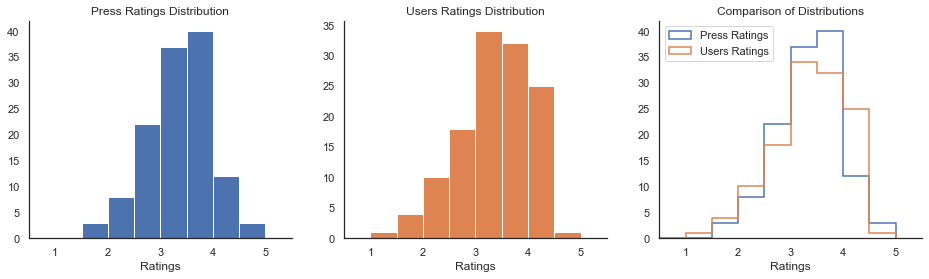

In [11]:
sns.set(style="white", palette="deep")

fig, axes = plt.subplots(1, 3, figsize = (16,4))
ax1, ax2, ax3 = fig.axes

ax1.set_xlim([0.5,5.5])
ax2.set_xlim([0.5,5.5])
ax3.set_xlim([0.5,5.5])


ax1.hist(allocine["press_rating"], bins = 10, range = (0,5), color='C0') # bin range = 1
ax1.set_title('Press Ratings Distribution')
ax1.set_xlabel('Ratings')

ax2.hist(allocine["user_rating"], bins = 10, range = (0,5), color='C1') # bin range = 1
ax2.set_title('Users Ratings Distribution')
ax2.set_xlabel('Ratings')

ax3.hist(allocine["press_rating"], bins = 10, range = (0,5), histtype = 'step', 
         lw=1.5, label='Press Ratings', color='C0')
ax3.hist(allocine["user_rating"], bins = 10, range = (0,5), histtype = 'step', 
         lw=1.5, label='Users Ratings', color='C1')
ax3.legend(loc = 'upper left')
ax3.set_title('Comparison of Distributions')
ax3.set_xlabel('Ratings')

for ax in fig.axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [13]:
# save the fig
fig.savefig('allocine-0_hist.png', bbox_inches='tight', dpi=200)

## Ratings Correlation

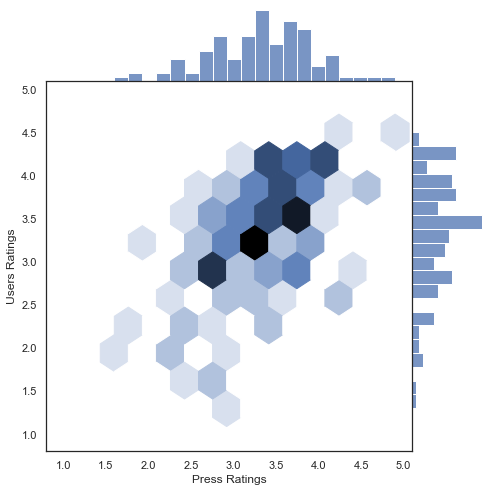

In [15]:
# Correlation between press_rating and user_rating
ax = sns.jointplot(x="press_rating", y="user_rating", 
                   data=allocine, kind="hex",
                   marginal_kws=dict(bins=20),
                   xlim=(0.8,5.1), ylim=(0.8,5.1),
                   height=7, space=0).set_axis_labels("Press Ratings", "Users Ratings")

In [16]:
# save the fig
ax.savefig('allocine-1_jointplot.png', bbox_inches='tight', dpi=200)

# **Section 2. Data Exploration**

## Number of movies per genres

### *Get all genres*

In [32]:
# Get all unique genres from list of genres
genres = [genre.lstrip() for genres in allocine["genres"] for genre in genres]
genres = sorted(list(set(genres)))
genres

['Action',
 'Animation',
 'Arts Martiaux',
 'Aventure',
 'Biopic',
 'Comédie',
 'Comédie dramatique',
 'Comédie musicale',
 'Drame',
 'Epouvante-horreur',
 'Erotique',
 'Espionnage',
 'Famille',
 'Fantastique',
 'Guerre',
 'Historique',
 'Musical',
 'Policier',
 'Romance',
 'Science fiction',
 'Sport event',
 'Thriller',
 'Western']

### *Create genre dataframe*

In [39]:
# Create dataframe with the number of movies per genre from genre list
genre_df = pd.DataFrame({"genre": genres, "nb_movies": [allocine[allocine["genres"].apply(lambda x: genre in x).values].shape[0] for genre in genres]})
genre_df

,genre,nb_movies
0,Action,9
1,Animation,9
2,Arts Martiaux,0
3,Aventure,6
4,Biopic,2
5,Comédie,24
6,Comédie dramatique,8
7,Comédie musicale,2
8,Drame,37
9,Epouvante-horreur,2


In [40]:
# Add the nb_press_rating and nb_user_rating to the genre_df
genre_df["nb_press_rating"] = [allocine[allocine["genres"].apply(lambda x: genre in x).values]["nb_press_rating"].sum() for genre in genres]
genre_df["nb_user_rating"] = [allocine[allocine["genres"].apply(lambda x: genre in x).values]["nb_user_rating"].sum() for genre in genres]
genre_df

,genre,nb_movies,nb_press_rating,nb_user_rating
0,Action,9,168,41541
1,Animation,9,137,9247
2,Arts Martiaux,0,0,0
3,Aventure,6,70,6233
4,Biopic,2,43,1221
5,Comédie,24,446,55804
6,Comédie dramatique,8,183,6546
7,Comédie musicale,2,69,6836
8,Drame,37,878,129426
9,Epouvante-horreur,2,40,2251


## Number of ratings per genres